# Perceptron Learning Algroithm

Read more in [wikipedia](https://en.wikipedia.org/wiki/Perceptron)

Read more in [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html)


### Learning Algorithm

* The hypothesis function
    
    $ \begin{align} h(x_n) = sign( w \cdot x_n ) \in \{ -1, +1 \} \end{align} $


* Learning procedure

    1. Initialize the weight to 0
        
    $ w^{(0)}=0 \\$
        
    2. Update weight when there is a sample $ (x_n, y_n) $ that the hypothesis cannot give a correct value: $ h(x_n) = w^{(t)} \cdot x_n \neq y_n $
    
    $ w^{(t+1)} = w^{(t)} + y_n x_n \\$
    
    3. If the hypothesis gives correct value for all the samples, return the curnt weight vector $w$


### Justification

PLA is a linear binary classifer. Not hard to imaging, the algorithm above would run forever if the data is not linear seperable, meaning none of the lines (or hyperplanes), *represented by $w$*, could seperate the samples with no error, *same meaning as $ \forall{n} \in \{1..N\}:  h(x_n)=y_n $.

*Would PLA always stop if the sample data is linear seperable?* The answer is **yes**. For the linear seperable data set, there must be a function $\forall{n}: f(x_n) = sign(w^{{*}} \cdot x_n) = y_n$. It can be proved that there must be a finite number $T$, such that $w^{(T)}$ has same direction as $w^*$. 

$w^{(T)}$ and $w^*$ having same direction means that the angle between the two vectors is $0$. It truns to a equivalent proposition: existing a finit $T$, such that ${w^{(T)} \cdot w^* \over \Vert w^{(T)} \Vert \Vert w^* \Vert} = cos(0) = 1$.

It could be proved that $1 \geq {w^{(t)} \cdot w^* \over \Vert w^{(t)} \Vert \Vert w^* \Vert} \geq \sqrt{t} \cdot C $, where $C$ is a constant with value $ \min\limits_{\substack{n}} y_n w^* x_n \over \Vert w^* \Vert \cdot \max\limits_{\substack{n}} \Vert x_n \Vert $. Thus, $t$ has a upper bound, so that the infinit $T$ is existing.

### A implementation of the learning algorithm

In [1]:
class Perceptron:
    def __init__(self, eta=0.5, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        
        self.w_ = np.ones(1 + X.shape[1])
        self.playback_= []
        
        for i in range(self.n_iter):
            err = 0.
            for xi, yi in zip(X, y):
                e = yi - self.predict(xi)
                self.w_ += self.eta * e * np.append([1], xi)
                err += np.abs(e)
                if e != 0.0:
                    self.playback_.append(self.w_.copy())
            if err == 0:
                break
        return self
    
    def score(self, x):
        x = np.insert(x, 0, 1, len(x.shape) - 1)
        return np.dot(x, self.w_)
    
    def predict(self, x):
        return np.where(self.score(x) >= 0, 1, -1)
                

In [2]:
def playback(fig, p, X, y):
    from matplotlib.colors import ListedColormap
    cmap = ListedColormap(['#AAAAFF','#AAFFAA','#FFAAAA'])
    steps = len(p.playback_)
    if steps <= 9:
        idxs = range(steps)
    else:
        idxs = np.linspace(0, steps-1, num=9, endpoint=True, dtype='int')
    fig.clear()
    for i in range(len(idxs)):
        ax = fig.add_subplot(3, 3, i + 1)
        ax.set_xlim(-8, 16)
        ax.set_ylim(-7, 14)
        ax.set_title(str(i+1))
        ax.plot(X[[0]][y == 1], X[[1]][y == 1], 'o')
        ax.plot(X[[0]][y == -1], X[[1]][y == -1], 'x')
        xx, yy = np.meshgrid(np.arange(-8, 16, 0.1), np.arange(-7, 14, 0.1))
        p.w_ = p.playback_[idxs[i]]
        Z = p.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        ax.pcolormesh(xx, yy, Z, cmap=cmap)        
    fig.tight_layout()

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target
df['is_setosa'] = np.where(df.label==0, 1, -1)
fn = iris.feature_names
df.rename(columns={fn[0]: 'sepal_length', fn[1]: 'sepal_width', fn[2]: 'petal_length', fn[3]: 'petal_width'}, 
          inplace=True)
columns = ['sepal_length', 'petal_length', 'is_setosa']
samples = np.random.permutation(df.shape[0])
data_set = df[columns]
training_set = data_set.iloc[samples[:100]]
test_set = data_set.iloc[samples[100:]]

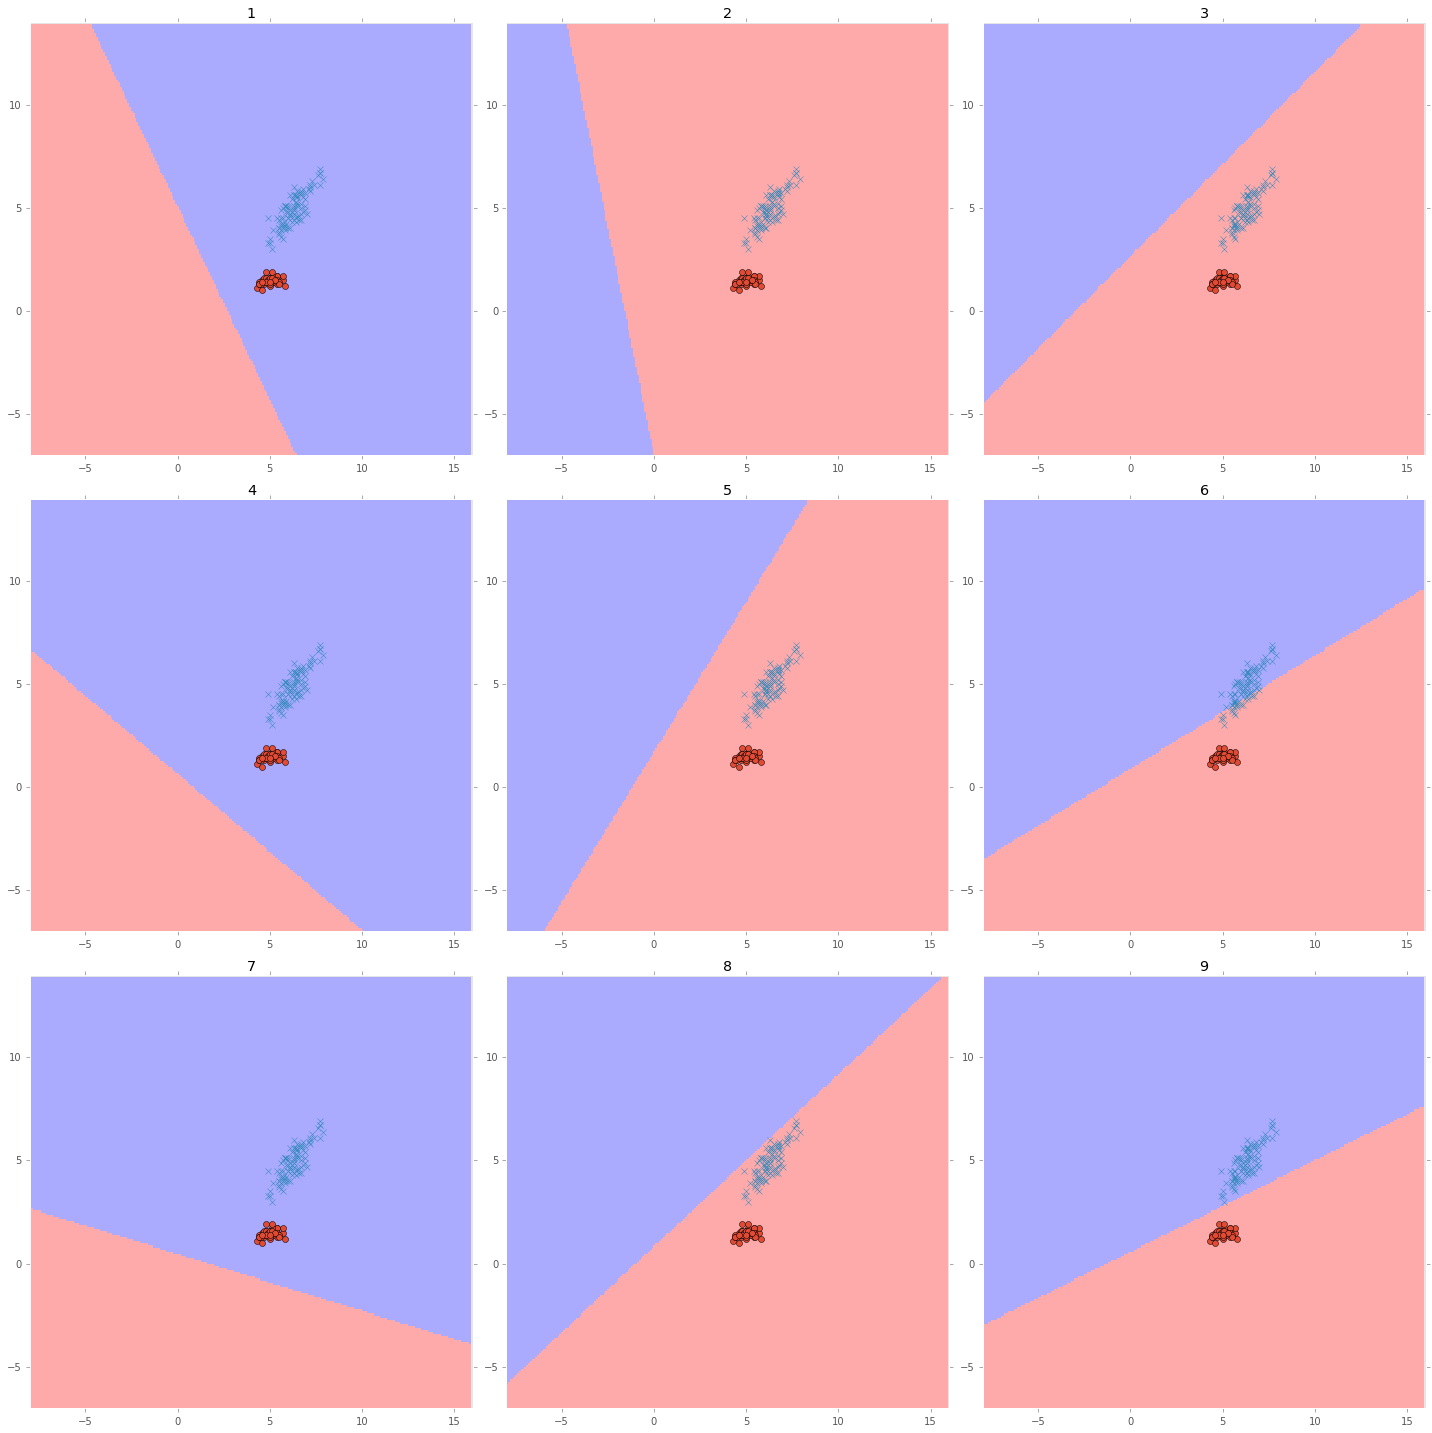

In [42]:
fig = plt.figure(figsize=(20, 20))
p = Perceptron(0.1).fit(training_set[[0,1]], training_set[[2]])
playback(fig, p, data_set[[0,1]], data_set.is_setosa)